# Separatrix operational space

There are lots of different algorithms which we can use with `cfspopcon`. For example, we can use the machinery developed to run the "separatrix operational space" as defined by [*Eich, Manz & The ASDEX Upgrade Team*, NF 2021, "The separatrix operational space of ASDEX Upgrade due to interchange-drift-Alfvén turbulence"](https://doi.org/10.1088/1741-4326/ac0412).

In [1]:
%reload_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import cfspopcon
from cfspopcon.unit_handling import Quantity, ureg

Just like for the `getting_started.ipynb` example, we use input files to define cases.

In [2]:
input_parameters, algorithm, points  = cfspopcon.read_case("../../example_cases/AUG_SepOS")
algorithm.validate_inputs(input_parameters);

dataset = xr.Dataset(input_parameters)

dataset

Magnitude,[1e+17 1.8923076923076923e+18 3.6846153846153846e+18 5.476923076923077e+18 7.269230769230769e+18 9.061538461538462e+18 1.0853846153846153e+19 1.2646153846153847e+19 1.4438461538461538e+19 1.623076923076923e+19 1.8023076923076923e+19 1.9815384615384617e+19 2.1607692307692306e+19 2.34e+19 2.5192307692307694e+19 2.6984615384615383e+19 2.8776923076923077e+19 3.056923076923077e+19 3.236153846153846e+19 3.4153846153846153e+19 3.5946153846153847e+19 3.773846153846154e+19 3.953076923076923e+19 4.132307692307692e+19 4.311538461538461e+19 4.490769230769231e+19 4.67e+19 4.849230769230769e+19 5.028461538461539e+19 5.207692307692307e+19 5.386923076923077e+19 5.566153846153846e+19 5.745384615384615e+19 5.924615384615385e+19 6.103846153846154e+19 6.283076923076923e+19 6.462307692307692e+19 6.641538461538461e+19 6.820769230769231e+19 7e+19]
Units,1/meter3
Magnitude,[1.0 6.137931034482759 11.275862068965518 16.413793103448278 21.551724137931036 26.689655172413794 31.827586206896555 36.96551724137931 42.10344827586207 47.24137931034483 52.37931034482759 57.51724137931035 62.65517241379311 67.79310344827587 72.93103448275862 78.06896551724138 83.20689655172414 88.3448275862069 93.48275862068967 98.62068965517241 103.75862068965517 108.89655172413794 114.0344827586207 119.17241379310346 124.31034482758622 129.44827586206898 134.58620689655174 139.72413793103448 144.86206896551724 150.0]
Units,electron_volt


In this case, we're only running a single algorithm, instead of a composite algorithm.

In [3]:
algorithm

Algorithm: run_calc_separatrix_operational_space

We run this algorithm on the input data using the `algorithm.update_dataset` method.

In [4]:
algorithm.update_dataset(dataset, in_place=True)

dataset

Magnitude,[1e+17 1.8923076923076923e+18 3.6846153846153846e+18 5.476923076923077e+18 7.269230769230769e+18 9.061538461538462e+18 1.0853846153846153e+19 1.2646153846153847e+19 1.4438461538461538e+19 1.623076923076923e+19 1.8023076923076923e+19 1.9815384615384617e+19 2.1607692307692306e+19 2.34e+19 2.5192307692307694e+19 2.6984615384615383e+19 2.8776923076923077e+19 3.056923076923077e+19 3.236153846153846e+19 3.4153846153846153e+19 3.5946153846153847e+19 3.773846153846154e+19 3.953076923076923e+19 4.132307692307692e+19 4.311538461538461e+19 4.490769230769231e+19 4.67e+19 4.849230769230769e+19 5.028461538461539e+19 5.207692307692307e+19 5.386923076923077e+19 5.566153846153846e+19 5.745384615384615e+19 5.924615384615385e+19 6.103846153846154e+19 6.283076923076923e+19 6.462307692307692e+19 6.641538461538461e+19 6.820769230769231e+19 7e+19]
Units,1/meter3
Magnitude,[1.0 6.137931034482759 11.275862068965518 16.413793103448278 21.551724137931036 26.689655172413794 31.827586206896555 36.96551724137931 42.10344827586207 47.24137931034483 52.37931034482759 57.51724137931035 62.65517241379311 67.79310344827587 72.93103448275862 78.06896551724138 83.20689655172414 88.3448275862069 93.48275862068967 98.62068965517241 103.75862068965517 108.89655172413794 114.0344827586207 119.17241379310346 124.31034482758622 129.44827586206898 134.58620689655174 139.72413793103448 144.86206896551724 150.0]
Units,electron_volt
Magnitude,[[0.02327125511407472 0.012309037184411077 0.009942949720421135 ... 0.004109883696602684 0.004058118393895201 0.004008775866984914] [0.35373308057064146 0.1871026560774922 0.15113710959390206 ... 0.062471998766712264 0.061685143914937846 0.060935116296678485] [0.6554140579379163 0.3466730080005114 0.280034273707587 ... 0.11575119339455323 0.11429327000616768 0.11290358192820826] ... [9.524221382435801 5.037716898993595 4.0693488111195215 ... 1.6820511824836284 1.6608652086073548 1.6406708036404252] [9.761860076514258 5.163412892077247 4.17088306766332 ... 1.7240200144047013 1.7023054296359912 1.6816071543964861] [9.999033956362837 5.2888630275304696 4.272218726215975 ... 1.7659067565366344 1.743664594822698 1.72246343486591]]
Units,dimensionless
Magnitude,[[0.0007406588038649307 0.02018371888912483 0.027556150498563196 ... 0.052802787751338606 0.053281660052395124 0.05374795713820178] [0.00019745840035508087 0.00972433519051818 0.034632780593940905 ... 0.2296033893602703 0.23169760753297367 0.23373547001456754] [0.00014630083122943793 0.0072271529482252 0.026430672989189656 ... 0.320061309992239 0.32302299812827 0.3259001933925443] ... [3.982014960223775e-05 0.0019694639188926146 0.007281200271486465 ... 1.044859995347916 1.0832251998787779 1.1192376640362902] [3.934583701023349e-05 0.0019460053819141696 0.007194489074961862 ... 1.0477647450241676 1.0871416130693343 1.1241597374568049] [3.888926014537491e-05 0.0019234239899926853 0.007111019182118515 ... 1.0502865304297957 1.0906508877563614 1.1286555050504867]]
Units,dimensionless
Magnitude,[[3.7432545754723546e-07 6.263676754189625e-05 0.00015712355313863625 ... 0.003731453596211316 0.003903753089313099 0.0040775873642592405] [3.9580610932085657e-07 0.000554682478892966 0.00365725629691438 ... 0.3060416012314767 0.32023129673360345 0.33454607048321305] [9.41448830484945e-08 0.0007186162817294266 0.005237335581903345 ... 0.8221692525404185 0.8607205565439016 0.8996037091319276] ... [6.993402132456407e-11 3.4596663784454033e-06 0.000113464993142369 ... 2.9466136426129554 3.151782407912292 3.3604892458997915] [6.522926879129289e-11 3.199417672645089e-06 0.00010440185744470669 ... 2.843252295094203 3.04221522674594 3.244583484613488] [6.094448241122916e-11 2.9638964040478758e-06 9.6230454613172e-05 ... 2.744173178857866 2.9372238384118257 3.133554189107688]]
Units,dimensionless
Magnitude,[[12.379399434320236 0.32859092678523283 0.09736437191279555 ... 0.0006340984601624658 0.0005899160453269007 0.0005501955304142326] [234.25632775713677 6.217951383782098 1.8424334992729001 ...

Let's compare this result to Figure 1 of [*Eich, Manz & The ASDEX Upgrade Team*, NF 2021, "The separatrix operational space of ASDEX Upgrade due to interchange-drift-Alfvén turbulence"](https://doi.org/10.1088/1741-4326/ac0412). We've used WebPlotDigitizer to extract some of the data points, which we define in the cell below.

In [5]:
LH_transition = np.array([
    [0.40384615384615385, 142.07865168539323],
    [0.4725274725274725, 118.98876404494379],
    [0.5686813186813188, 98.42696629213481],
    [0.6785714285714285, 82.75280898876403],
    [0.8983516483516484, 67.41573033707864],
    [1.1648351648351647, 60.16853932584269],
    [1.5549450549450552, 56.79775280898875],
    [2.027472527472528, 56.123595505617956],
    [2.5000000000000004, 57.30337078651684],
    [3.3241758241758244, 61.01123595505618],
    [4.502747252747253, 68.93258426966288],
    [5.500000000000001, 76.76966292134827],
    [6.502747252747252, 85.44943820224717],
])

LDL_limit = np.array([
    [1.9395604395604398, 26.292134831460658],
    [2.2005494505494507, 33.876404494382015],
    [2.401098901098902, 40.44943820224721],
    [2.598901098901099, 47.443820224719104],
    [2.7994505494505555, 55.02808988764066],
])

MHD_limit = np.array([
    [4.054945054945055, 149.49438202247188],
    [4.299450549450548, 144.438202247191],
    [4.802197802197801, 137.86516853932582],
    [5.302197802197801, 133.9887640449438],
    [5.79945054945055, 131.5449438202247],
    [6.302197802197802, 130.36516853932582],
    [6.799450549450549, 129.60674157303367],
])

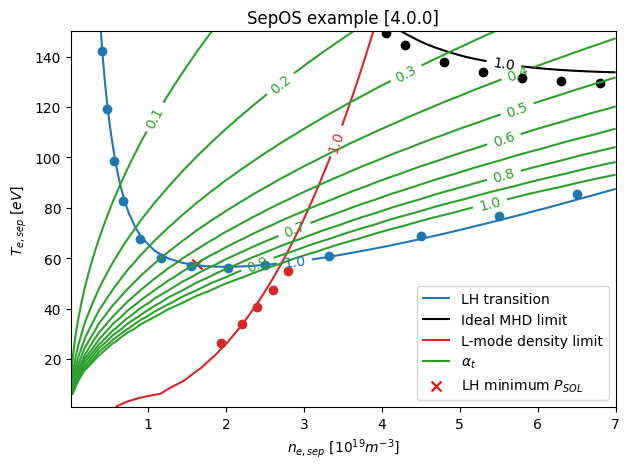

In [6]:
fig, ax = plt.subplots()

plot_style = cfspopcon.read_plot_style("../../example_cases/AUG_SepOS/plot_sepos.yaml")

cfspopcon.plotting.make_plot(
    dataset,
    plot_style,
    points=points,
    title="SepOS example",
    output_dir=None,
    ax=ax,
)

ax.scatter(LH_transition[:, 0], LH_transition[:, 1], color="tab:blue")
ax.scatter(LDL_limit[:, 0], LDL_limit[:, 1], color="tab:red")
ax.scatter(MHD_limit[:, 0], MHD_limit[:, 1], color="black")

plt.show()

This is a pretty good match! We can also calculate power required to reach the LH transition. This isn't currently calculated by the main algorithm, but we can use the formulas directly.

Apologies that this is a bit messy!

In [7]:
from cfspopcon.formulas import separatrix_operational_space as sepos

poloidal_circumference = 2.0 * np.pi * dataset.minor_radius * (1 + 0.55 * (dataset.elongation_psi95 - 1)) * (1 + 0.08 * dataset.triangularity_psi95**2)
B_pol_avg = ureg.mu_0 * dataset.plasma_current / poloidal_circumference

rho_s_pol = sepos.calc_sound_larmor_radius_rho_s(
    electron_temperature=dataset.separatrix_electron_temp, magnetic_field_strength=B_pol_avg, ion_mass=dataset.ion_mass
)

lambda_q = sepos.calc_lambda_q_Eich2020H(dataset.alpha_t_turbulence_param, rho_s_pol)
B_pol_omp = 16.0 / 9.0 * dataset.major_radius / (dataset.major_radius + dataset.minor_radius) * B_pol_avg
B_tor_omp = dataset.magnetic_field_on_axis * (dataset.major_radius / (dataset.major_radius + dataset.minor_radius))

edge_safety_factor = sepos.calc_cylindrical_edge_safety_factor(
    dataset.major_radius,
    dataset.minor_radius,
    dataset.elongation_psi95,
    dataset.triangularity_psi95,
    dataset.magnetic_field_on_axis,
    dataset.plasma_current,
)

electron_separatrix_power = sepos.calc_power_crossing_separatrix(
    separatrix_temp=dataset.separatrix_electron_temp,
    target_temp=Quantity(10.0, ureg.eV),
    cylindrical_edge_safety_factor=edge_safety_factor,
    major_radius=dataset.major_radius,
    minor_radius=dataset.minor_radius,
    lambda_q=lambda_q,
    B_pol_omp=B_pol_omp,
    B_tor_omp=B_tor_omp,
    f_share=0.6,
    Zeff=dataset.z_effective,
)

kappa95_to_kappaA = 1.025
ion_separatrix_power = sepos.calc_power_crossing_separatrix_in_ion_channel(
    surface_area=cfspopcon.formulas.calc_plasma_surface_area(
        dataset.major_radius, dataset.minor_radius / dataset.major_radius, dataset.elongation_psi95 * kappa95_to_kappaA
    ),
    separatrix_density=dataset.separatrix_electron_density,
    separatrix_temp=dataset.separatrix_electron_temp,
    lambda_Te=3.5 * lambda_q,
    chi_i=Quantity(0.5, ureg.m**2 / ureg.s),
)

This gives us the power required to sustain *any* point in the 2D space, but we really want the power of the LH transition.

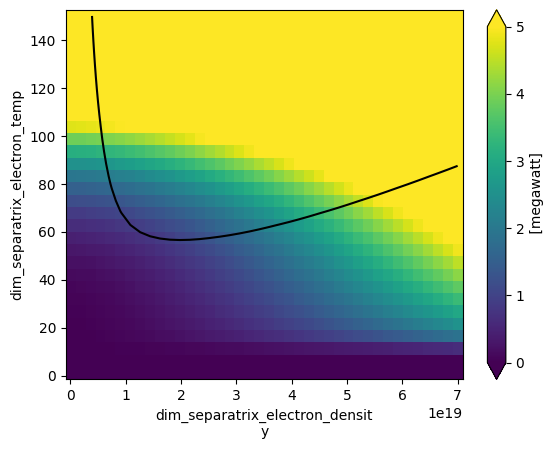

In [8]:
electron_separatrix_power.T.plot(vmin=0.0, vmax=5.0)
dataset.LH_transition_condition.T.plot.contour(levels=[1.0], colors=["k"])

For this, we interpolate onto the curve corresponding to the LH transition, and compare this to Figure 5 of [*Eich, Manz & The ASDEX Upgrade Team*, NF 2021, "The separatrix operational space of ASDEX Upgrade due to interchange-drift-Alfvén turbulence"](https://doi.org/10.1088/1741-4326/ac0412)

In [9]:
LH_separatrix_density, LH_separatrix_temp = sepos.extract_LH_contour_points(dataset.LH_transition_condition)

LH_electron_separatrix_power = sepos.interpolate_field_to_LH_curve(electron_separatrix_power.broadcast_like(dataset.alpha_t_turbulence_param), LH_separatrix_density, LH_separatrix_temp)
LH_ion_separatrix_power = sepos.interpolate_field_to_LH_curve(ion_separatrix_power.broadcast_like(dataset.alpha_t_turbulence_param), LH_separatrix_density, LH_separatrix_temp)

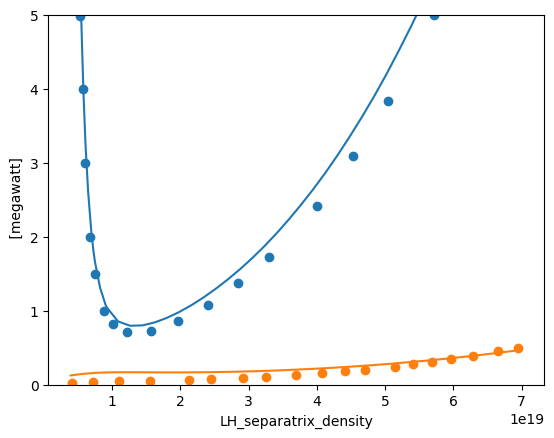

In [10]:
P_LH_e = np.array([
    [0.5335805521219613e19, 4.988221436984688],
    [0.5681911825298723e19, 3.998822143698469],
    [0.6056860321384426e19, 2.9946996466431095],
    [0.677791512154924e19, 1.9935217903415783],
    [0.747012772970746e19, 1.4899882214369842],
    [0.8796868562010712e19, 1.001177856301532],
    [1.0065925010300782e19, 0.8186101295641928],
    [1.2142562834775443e19, 0.7067137809187276],
    [1.5718994643592912e19, 0.727326266195524],
    [1.9699217140502676e19, 0.8568904593639575],
    [2.4083230325504736e19, 1.0806831566548887],
    [2.84672435105068e19, 1.3692579505300357],
    [3.2966625463535224e19, 1.7196702002355715],
    [4.00041203131438e19, 2.417550058892815],
    [4.536876802637001e19, 3.0918727915194344],
    [5.044499381953029e19, 3.8339222614840986],
    [5.719406674907293e19, 4.994110718492344],
])

P_LH_i = np.array([
    [0.42005754212905844e19, 0.01758499413833514],
    [0.7250308261405669e19, 0.0316529894490033],
    [1.104808877928483e19, 0.04308323563892125],
    [1.5536374845869299e19, 0.053927315357561345],
    [2.1290587751746815e19, 0.06828839390386848],
    [2.451294697903822e19, 0.07796014067995294],
    [2.917385943279901e19, 0.09466588511137147],
    [3.2568845047266746e19, 0.10873388042203969],
    [3.699958898479244e19, 0.13130128956623666],
    [4.07973695026716e19, 0.15445486518171148],
    [4.419235511713934e19, 0.1793669402110198],
    [4.70694615700781e19, 0.20252051582649455],
    [5.150020550760377e19, 0.24443141852286038],
    [5.411837237977805e19, 0.27227432590855793],
    [5.685162351006989e19, 0.30480656506447823],
    [5.964241676942047e19, 0.34202813599062126],
    [6.286477599671187e19, 0.38774912075029305],
    [6.942457870941224e19, 0.49882766705744436],
    [6.660501438553226e19, 0.44753810082063306],
])

fig, ax = plt.subplots()

ax.scatter(P_LH_e[:, 0], P_LH_e[:, 1], color="tab:blue")
ax.scatter(P_LH_i[:, 0], P_LH_i[:, 1], color="tab:orange")

LH_electron_separatrix_power.plot()
LH_ion_separatrix_power.plot()

ax.set_ylim(0.0, 5.0)
plt.show()